In [302]:
import numpy
import pandas
import matplotlib
from scipy.interpolate import interp1d
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [303]:
def enveloppe(s):
    u_x = [] # do not add 0
    u_y = []
    q_u = np.zeros(s.shape)
    for k in range(1,len(s)-1):
        if (np.sign(s[k]-s[k-1])==1) and (np.sign(s[k]-s[k+1])==1):
            u_x.append(float(k))
            u_y.append(s[k])
#    print(u_x),len(u_x)
#    print day
    u_p = interp1d(u_x,u_y,fill_value="extrapolate") #,kind = 'cubic')#,fill_value="extrapolate")
#    u_p = interp1d(u_x,u_y, kind = 'linear',
#              bounds_error = False, 
#              fill_value="extrapolate") # use fill_value="extrapolate"
    for k in range(0,len(s)):
        q_u[k] = u_p(float(k+0.1))
    return q_u

In [304]:
Eall = loadtxt('EnergyEnv_2009(all)IRK.dat') #огибающая спектральной энергии по всем периодам
En = loadtxt('EnergyEnv_2009(26-30)IRK.dat') #огибающая спектральной энергии по определённым периодам

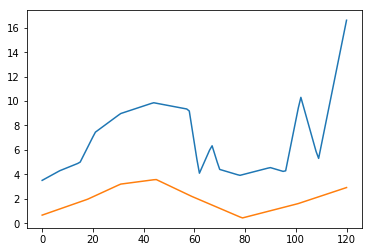

In [305]:
plot(Eall[:,0], Eall[:,1])
plot(En[:,0], En[:,1])

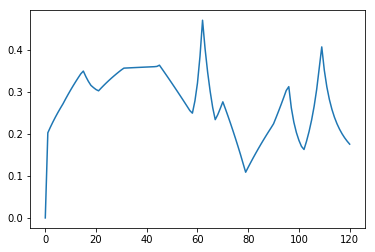

In [306]:
#расчёт относительной энергии
N = len(Eall)
Erev = np.zeros(2*N).reshape(N,2)
for i in range(1, N):
    Erev[i,0] = i
    Erev[i,1] = En[i,1]/Eall[i,1] #отношение энергий по определённым периодам к энергии по всем периодам
plot(Erev[:,0], Erev[:,1])

In [307]:
savetxt('RevEnEnv_2009(26-30)IRK.dat', Erev)